In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Emincan\Desktop\ML-Projects\datasets-master-a6fa39d2490c3afd5b5eb24b6f250c13fe8b4f5a\Wireless Indoor Localization\wifi_localization.txt" , sep = "\t" , header=None)
df.rename(columns = {0: 'wifi1' ,1: 'wifi2',2: 'wifi3',3: 'wifi4',4: 'wifi5',5: 'wifi6',6: 'wifi7',7: 'Room'} , inplace=True)
df.head()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   wifi1   2000 non-null   int64
 1   wifi2   2000 non-null   int64
 2   wifi3   2000 non-null   int64
 3   wifi4   2000 non-null   int64
 4   wifi5   2000 non-null   int64
 5   wifi6   2000 non-null   int64
 6   wifi7   2000 non-null   int64
 7   Room    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
df.groupby("Room").describe()

wifi1                                                  wifi2          \
      count    mean       std   min   25%   50%   75%   max  count    mean   
Room                                                                         
1     500.0 -62.490  3.300862 -74.0 -65.0 -62.0 -60.0 -55.0  500.0 -56.276   
2     500.0 -36.924  8.724130 -52.0 -42.0 -38.0 -36.0 -10.0  500.0 -56.108   
3     500.0 -49.726  2.755014 -63.0 -52.0 -50.0 -48.0 -42.0  500.0 -54.886   
4     500.0 -60.182  3.011813 -71.0 -62.0 -60.0 -58.0 -52.0  500.0 -55.224   

      ...  wifi6        wifi7                                                   
      ...    75%   max  count    mean       std   min    25%   50%   75%   max  
Room  ...                                                                       
1     ... -80.75 -74.0  500.0 -84.026  3.944165 -96.0 -87.00 -84.0 -81.0 -74.0  
2     ... -70.00 -61.0  500.0 -73.498  4.795831 -92.0 -77.00 -73.0 -70.0 -63.0  
3     ... -79.00 -73.0  500.0 -82.392  4.222083 -93.0 -85.25 -82.0 -79.0 -73.0  
4     ... -85.00 -76.0  500.0 -86.990  3.543870 -98.0 -89.00 -87.0 -85.0 -78.0  

[4 rows x 56 columns]

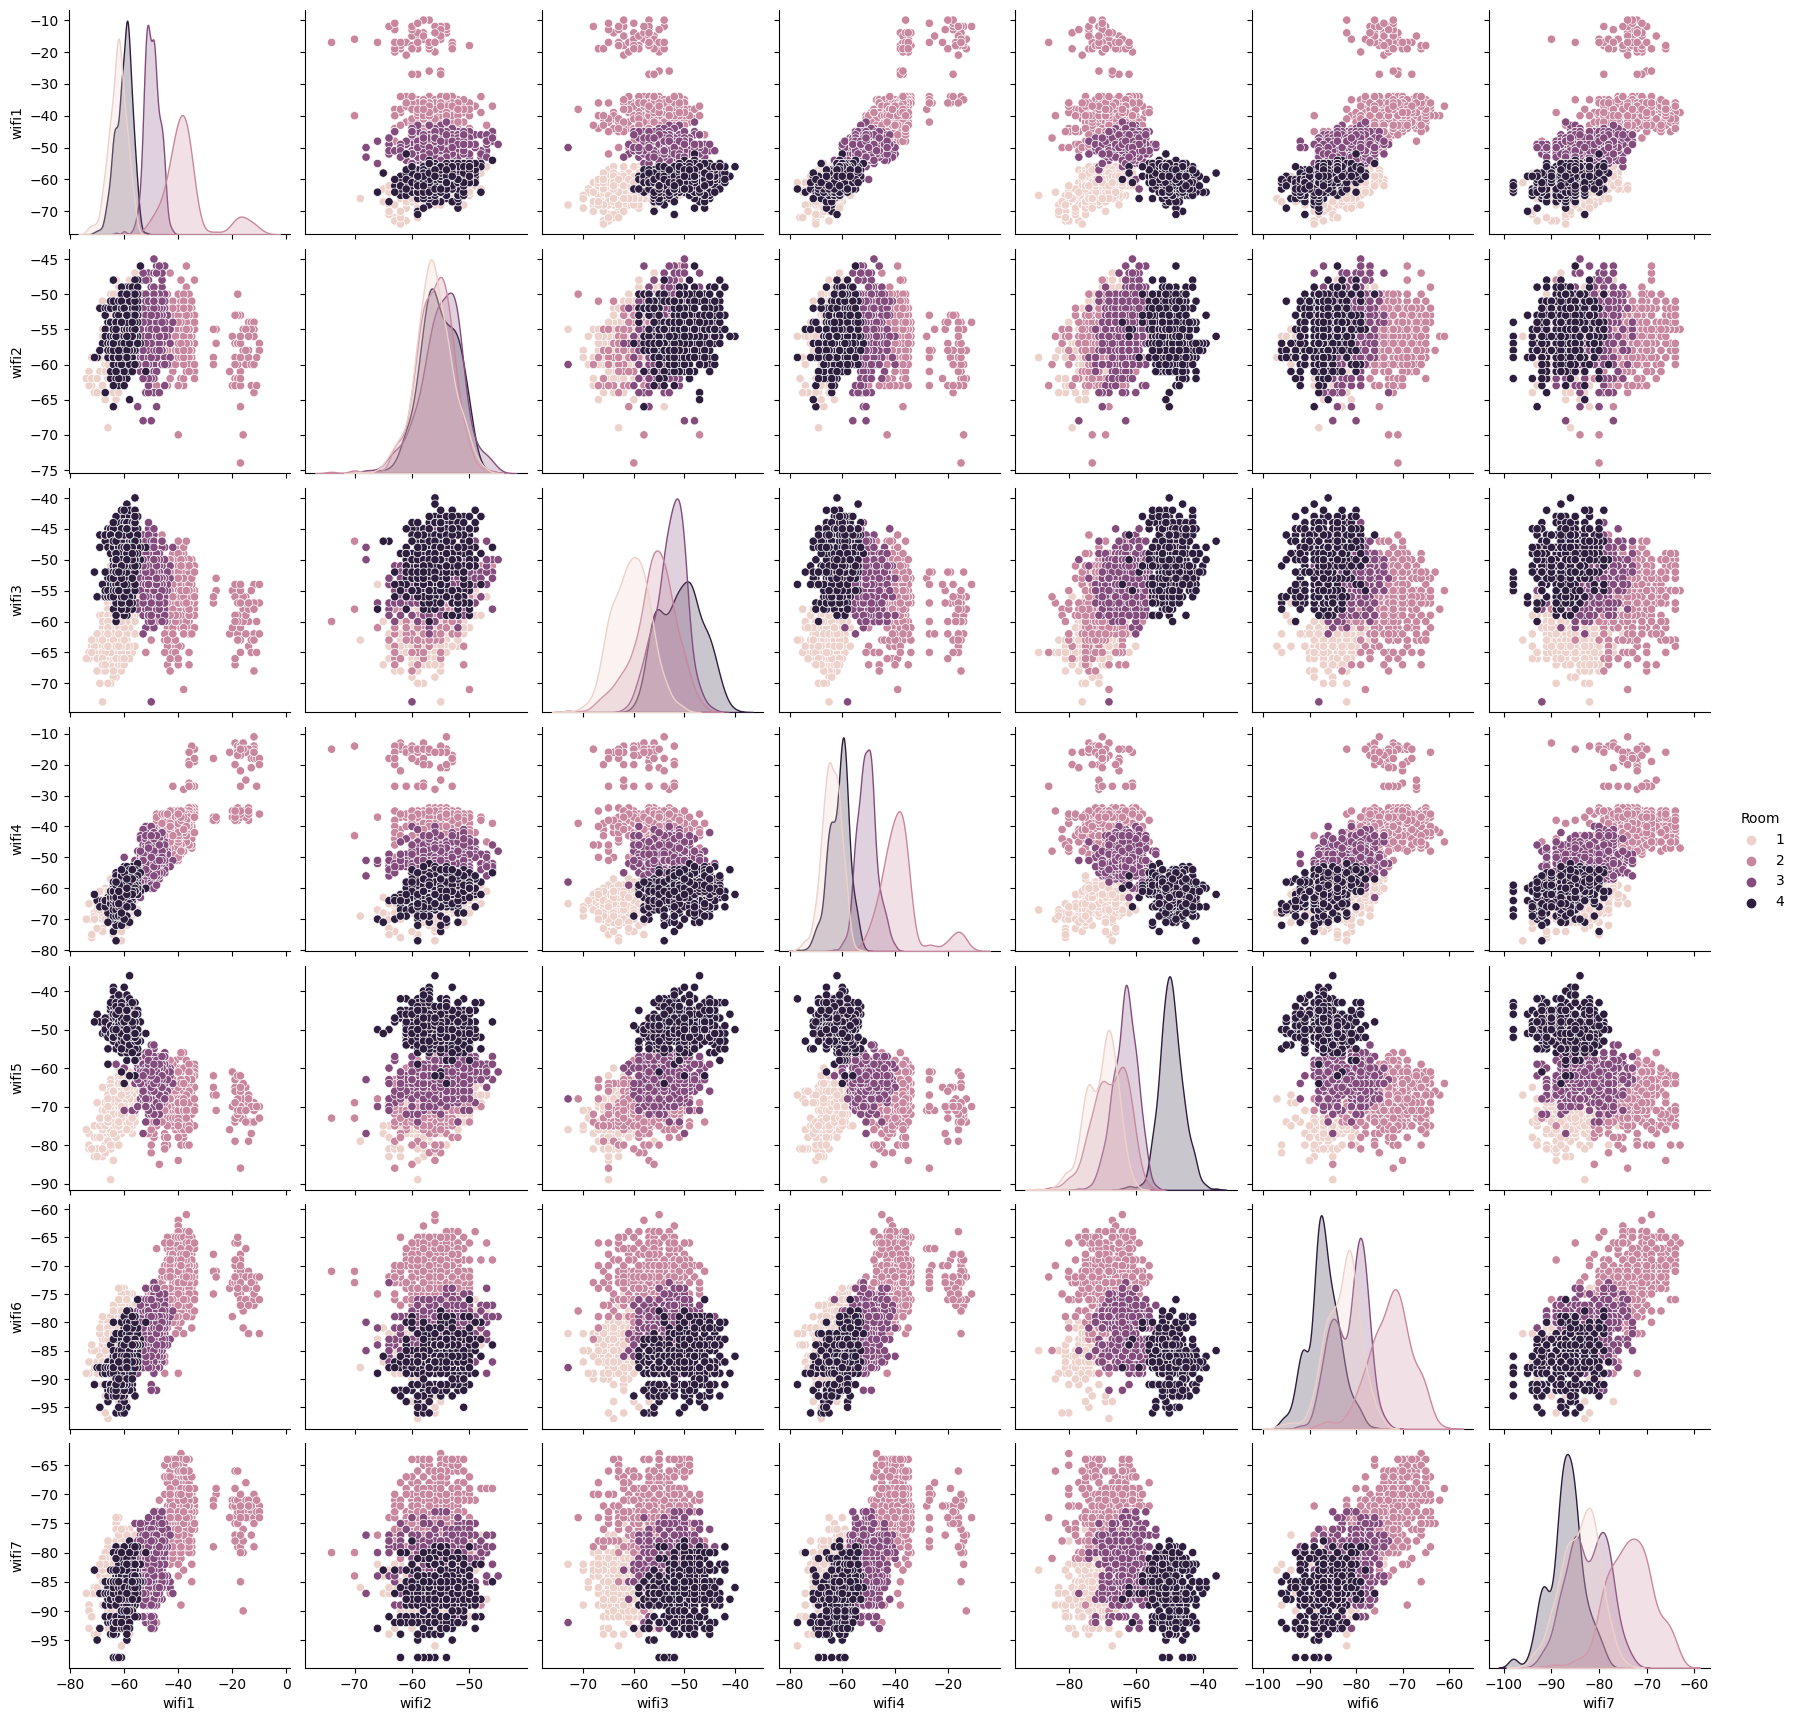

In [5]:
sns.pairplot(df , hue = 'Room');

In [6]:
df['Room'] = df['Room'].astype('category')

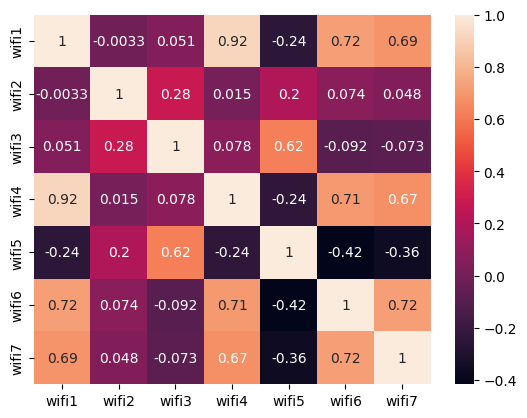

In [7]:
sns.heatmap(df.corr(numeric_only=True) , annot= True);

# Utils

In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Room'
    
    def trainTest(data , label=label , test_size = 0.2):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        X = data.drop(label ,axis = 1)
        y = data[label]
        X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test
    
    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
        print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, average="weighted")}')
        print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, average="weighted")}')
        print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , average="weighted")}')
        
        
        print("\n****************\n")
        
        print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
        print(f'{name} Test Recall : {recall_score(y_test, y_pred, average="weighted")}')
        print(f'{name} Test Precision : {precision_score(y_test , y_pred, average="weighted")}')
        print(f'{name} Test F1 : {f1_score(y_test , y_pred, average="weighted")}')
        
        
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
    
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='classification'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional
            Datamızın task'i, by default 'classification'.
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'classification':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , average='weighted'),
            "Precision" : precision_score(y_train, y_train_pred , average='weighted'),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , average='weighted'))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , average='weighted'),
            "Precision" : precision_score(y_test, y_pred , average='weighted'),
            "F1" : np.sqrt(f1_score(y_test, y_pred , average='weighted'))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)
        
        
    # def searchAlgorithms(base_model, params , X_train, y_train , complexity = 'normal' , searchType = 'grid' ):
    #     if searchType == 'grid':
    #         model_grid = GridSearchCV()

### Train | Test Split

In [9]:
X_train , X_test, y_train , y_test = fonks.trainTest(df)

# Models

### Gaussian NB

In [12]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_train_pred = nb.predict(X_train)
nb_pred = nb.predict(X_test)

fonks.simple_scores(y_train, nb_train_pred , y_test , nb_pred)

Model Train Accuracy : 0.9825
Model Train Recall : 0.9825
Model Train Precision : 0.983078670493893
Model Train F1 : 0.9825251815294384

****************

Model Test Accuracy : 0.99
Model Test Recall : 0.99
Model Test Precision : 0.9900481169612289
Model Test F1 : 0.9899849135370302


In [13]:
fonks.eval_metric(y_train, nb_train_pred , y_test , nb_pred , 'NB')

Test_Set NB
[[106   0   0   0]
 [  0  91   2   0]
 [  1   0  99   1]
 [  0   0   0 100]]
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       106
           2       1.00      0.98      0.99        93
           3       0.98      0.98      0.98       101
           4       0.99      1.00      1.00       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Train_Set NB
[[393   0   1   0]
 [  0 387  20   0]
 [  2   1 395   1]
 [  2   0   1 397]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       394
           2       1.00      0.95      0.97       407
           3       0.95      0.99      0.97       399
           4       1.00      0.99      0.99       400

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weigh

In [14]:
nb_df = fonks.train_test_df(y_train, nb_train_pred , y_test , nb_pred , 'NB')
nb_df

,NB_train,NB_test
Accuracy,0.982500,0.990000
Recall,0.982500,0.990000
Precision,0.983079,0.990048
F1,0.991224,0.994980


### Decision Tree Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_base = DecisionTreeClassifier()

params = {'max_depth' : np.arange(2,11) , 'min_samples_split' : np.arange(2,8) , 'max_features' : np.arange(2,8)}

dt_grid = GridSearchCV(dt_base , params , scoring='accuracy' , cv = 5) 
dt_grid.fit(X_train , y_train)

print(f'Best parameters: {dt_grid.best_params_}')
print(f'Best score: {dt_grid.best_score_:.2f}')

Best parameters: {'max_depth': 8, 'max_features': 6, 'min_samples_split': 7}
Best score: 0.97


In [22]:
dt = DecisionTreeClassifier(max_depth= 8 , max_features= 6 , min_samples_split= 4)
dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_test)

fonks.simple_scores(y_train, dt_train_pred , y_test , dt_pred)

Model Train Accuracy : 0.991875
Model Train Recall : 0.991875
Model Train Precision : 0.9920657643508253
Model Train F1 : 0.9918855965742918

****************

Model Test Accuracy : 0.9775
Model Test Recall : 0.9775
Model Test Precision : 0.9778537235132041
Model Test F1 : 0.9774413112723782


In [23]:
fonks.eval_metric(y_train, dt_train_pred , y_test , dt_pred , 'DT')

Test_Set DT
[[106   0   0   0]
 [  0  88   5   0]
 [  3   0  97   1]
 [  0   0   0 100]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.99       106
           2       1.00      0.95      0.97        93
           3       0.95      0.96      0.96       101
           4       0.99      1.00      1.00       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400


Train_Set DT
[[394   0   0   0]
 [  0 398   9   0]
 [  0   0 399   0]
 [  2   0   2 396]]
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       394
           2       1.00      0.98      0.99       407
           3       0.97      1.00      0.99       399
           4       1.00      0.99      0.99       400

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weigh

In [24]:
dt_df = fonks.train_test_df(y_train, dt_train_pred , y_test , dt_pred , 'DT')
all_df = pd.concat([nb_df , dt_df] , axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test
Accuracy,0.982500,0.990000,0.991875,0.977500
Recall,0.982500,0.990000,0.991875,0.977500
Precision,0.983079,0.990048,0.992066,0.977854
F1,0.991224,0.994980,0.995935,0.988656


### KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)

knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_pred = knn.predict(X_test)

fonks.simple_scores(y_train, knn_train_pred , y_test , knn_pred)

Model Train Accuracy : 0.9875
Model Train Recall : 0.9875
Model Train Precision : 0.987588337261804
Model Train F1 : 0.9875080323030175

****************

Model Test Accuracy : 0.995
Model Test Recall : 0.995
Model Test Precision : 0.9950247524752476
Model Test F1 : 0.994999462148716


In [26]:
fonks.eval_metric(y_train, knn_train_pred , y_test , knn_pred , 'KNN')

Test_Set KNN
[[106   0   0   0]
 [  0  92   1   0]
 [  0   0 100   1]
 [  0   0   0 100]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       1.00      0.99      0.99        93
           3       0.99      0.99      0.99       101
           4       0.99      1.00      1.00       100

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400


Train_Set KNN
[[393   0   1   0]
 [  0 398   9   0]
 [  2   2 393   2]
 [  3   0   1 396]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       394
           2       0.99      0.98      0.99       407
           3       0.97      0.98      0.98       399
           4       0.99      0.99      0.99       400

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
wei

In [27]:
knn_df = fonks.train_test_df(y_train, knn_train_pred , y_test , knn_pred , 'KNN')
all_df = pd.concat([all_df , knn_df] , axis = 1)
all_df

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test
Accuracy,0.982500,0.990000,0.991875,0.977500,0.987500,0.995000
Recall,0.982500,0.990000,0.991875,0.977500,0.987500,0.995000
Precision,0.983079,0.990048,0.992066,0.977854,0.987588,0.995025
F1,0.991224,0.994980,0.995935,0.988656,0.993734,0.997497


### LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

log_base = LogisticRegression(random_state= 53 , max_iter= 1000000)

params = {'penalty' : ['l1' , 'l2'] , 'C' : [0.001 , 0.01 , 0.1 , 1 , 3, 5, 10 ,25, 50 , 100 , 200 , 300 , 500 ,750] ,
          'solver' : ['lbfgs' , 'liblinear']}

log_rand = RandomizedSearchCV(log_base , params , scoring='accuracy' , cv = 5 , n_iter=50)
log_rand.fit(X_train , y_train)

print(f'Best parameters: {log_rand.best_params_}')
print(f'Best score: {log_rand.best_score_:.2f}')

c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

Best parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 3}
Best score: 0.98


In [33]:
log = LogisticRegression(solver = 'lbfgs' , penalty= 'l2' , C= 3 , max_iter=10000) 
log.fit(X_train , y_train)

log_train_pred = log.predict(X_train)
log_pred = log.predict(X_test)

fonks.simple_scores(y_train, log_train_pred , y_test , log_pred , 'Log')

Log Train Accuracy : 0.98375
Log Train Recall : 0.98375
Log Train Precision : 0.9838342743120992
Log Train F1 : 0.9837641656463676

****************

Log Test Accuracy : 0.9875
Log Test Recall : 0.9875
Log Test Precision : 0.9874747524752476
Log Test F1 : 0.9874751243781096


In [34]:
fonks.eval_metric(y_train, log_train_pred , y_test , log_pred , 'Log')

Test_Set Log
[[106   0   0   0]
 [  0  91   2   0]
 [  0   2  98   1]
 [  0   0   0 100]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       0.98      0.98      0.98        93
           3       0.98      0.97      0.98       101
           4       0.99      1.00      1.00       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


Train_Set Log
[[391   0   2   1]
 [  0 395  12   0]
 [  1   6 390   2]
 [  1   0   1 398]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       394
           2       0.99      0.97      0.98       407
           3       0.96      0.98      0.97       399
           4       0.99      0.99      0.99       400

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
wei

In [35]:
log_df = fonks.train_test_df(y_train, log_train_pred , y_test , log_pred , 'Log')
all_df = pd.concat([all_df, log_df] , axis = 1)
all_df 

,NB_train,NB_test,DT_train,DT_test,KNN_train,KNN_test,Log_train,Log_test
Accuracy,0.982500,0.990000,0.991875,0.977500,0.987500,0.995000,0.983750,0.987500
Recall,0.982500,0.990000,0.991875,0.977500,0.987500,0.995000,0.983750,0.987500
Precision,0.983079,0.990048,0.992066,0.977854,0.987588,0.995025,0.983834,0.987475
F1,0.991224,0.994980,0.995935,0.988656,0.993734,0.997497,0.991849,0.993718


### SVC

In [37]:
from sklearn.svm import SVC

svc_base = SVC(random_state= 53)

params = {'kernel' : ['linear' , 'poly' , 'rbf' , 'sigmoid'] , 'degree' : [2,3,4] , 'gamma' : ['scale' , 'auto'] , 'C' : np.arange(0.01,100,5) }

svc_grid = GridSearchCV(svc_base , params , scoring='accuracy' , cv = 3 )
svc_grid.fit(X_train,y_train)

print(f'Best parameters: {svc_grid.best_params_}')
print(f'Best score: {svc_grid.best_score_:.2f}')